# Data Understanding

## Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle

!kaggle datasets download -d vjchoudhary7/hr-analytics-case-study

/content/gdrive/My Drive/Kaggle
  0% 0.00/10.3M [00:00<?, ?B/s]
100% 10.3M/10.3M [00:00<00:00, 94.6MB/s]


In [ ]:
import zipfile
local_zip = "/content/gdrive/MyDrive/Kaggle/hr-analytics-case-study.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/content/gdrive/MyDrive/Kaggle")
zip_ref.close()

In [ ]:
!rm /content/gdrive/MyDrive/Kaggle/hr-analytics-case-study.zip
!rm /content/gdrive/MyDrive/Kaggle/data_dictionary.xlsx
!rm /content/gdrive/MyDrive/Kaggle/in_time.csv
!rm /content/gdrive/MyDrive/Kaggle/out_time.csv

In [ ]:
import numpy as np
import pandas as pd

general_data = pd.read_csv("/content/gdrive/MyDrive/Kaggle/general_data.csv", sep=",")
employee_survey_data = pd.read_csv("/content/gdrive/MyDrive/Kaggle/employee_survey_data.csv", sep=",")
manager_survey_data = pd.read_csv("/content/gdrive/MyDrive/Kaggle/manager_survey_data.csv", sep=",")

## Exploratory Data Analysis - Deskripsi Variabel

In [ ]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [ ]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [ ]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [ ]:
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [ ]:
general_data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [ ]:
employee_survey_data.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4385.000000,4390.000000,4372.000000
mean,2205.500000,2.723603,2.728246,2.761436
std,1273.201673,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


In [ ]:
manager_survey_data.describe()

,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.729932,3.153741
std,1273.201673,0.711400,0.360742
min,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000
75%,3307.750000,3.000000,3.000000
max,4410.000000,4.000000,4.000000


In [ ]:
print(general_data.BusinessTravel.unique())
print(general_data.Department.unique())
print(general_data.EducationField.unique())
print(general_data.Gender.unique())
print(general_data.MaritalStatus.unique())
print(general_data.StandardHours.unique())
print(general_data.Over18.unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Married' 'Single' 'Divorced']
[8]
['Y']


## Exploratory Data Analysis - Menangani Missing Value

In [ ]:
general_data.drop(columns=["EmployeeCount", "JobRole", "Over18", "StandardHours"], inplace=True)

In [ ]:
general_data = general_data.merge(employee_survey_data, how="inner", on="EmployeeID", sort="EmployeeID")
general_data = general_data.merge(manager_survey_data, how="inner", on="EmployeeID", sort="EmployeeID")
general_data.drop(columns=["EmployeeID"], inplace=True)

In [ ]:
general_data.dropna(axis=0, how="any", inplace=True)

## Exploratory Data Analysis - Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

numerical_features = ["Age", "DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager"]
categorical_features = ["Attrition", "BusinessTravel", "Department", "Education", "EducationField", "Gender", "JobLevel", "MaritalStatus", "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance", "JobInvolvement", "PerformanceRating"]

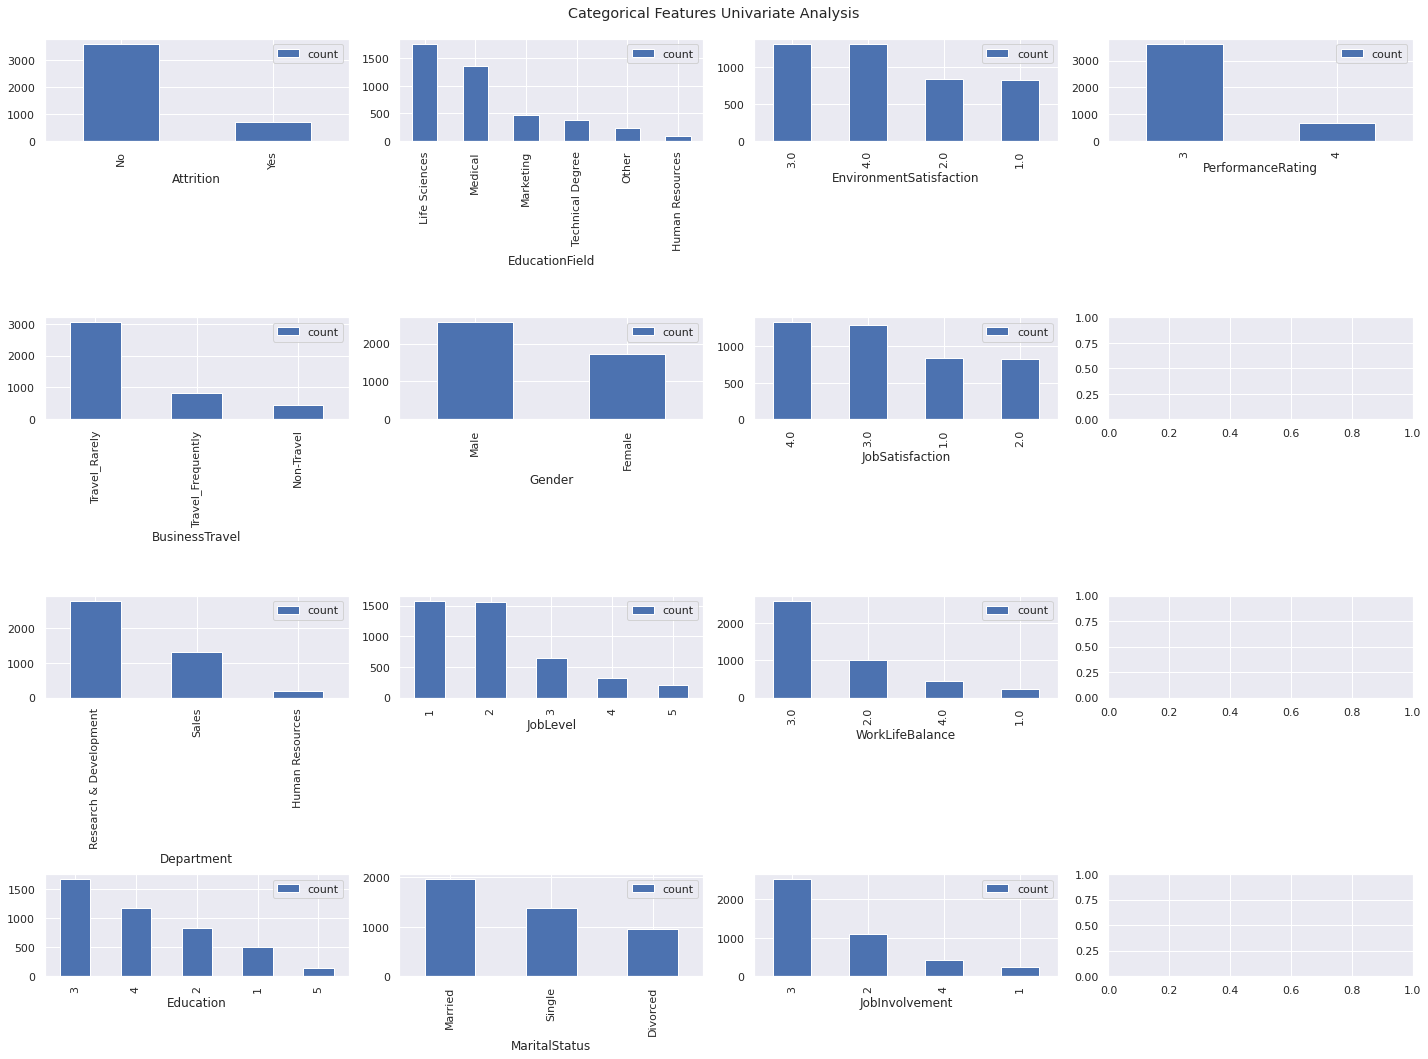

In [ ]:
f, axes = plt.subplots(4, 4, figsize=(20, 15))

j = 0
for i, feature in enumerate(categorical_features, 1):
  df = pd.DataFrame(general_data[feature].value_counts())
  df.reset_index(inplace=True)
  df = df.rename(columns = {feature: "count"})
  df = df.rename(columns = {'index': feature})
  df.plot(ax=axes[i-4*j-1, j], x = str(feature), y ="count", kind="bar")
  if i % 4 == 0:
    j += 1

plt.tight_layout()
plt.suptitle('Categorical Features Univariate Analysis')
plt.subplots_adjust(top=0.95)
plt.show()

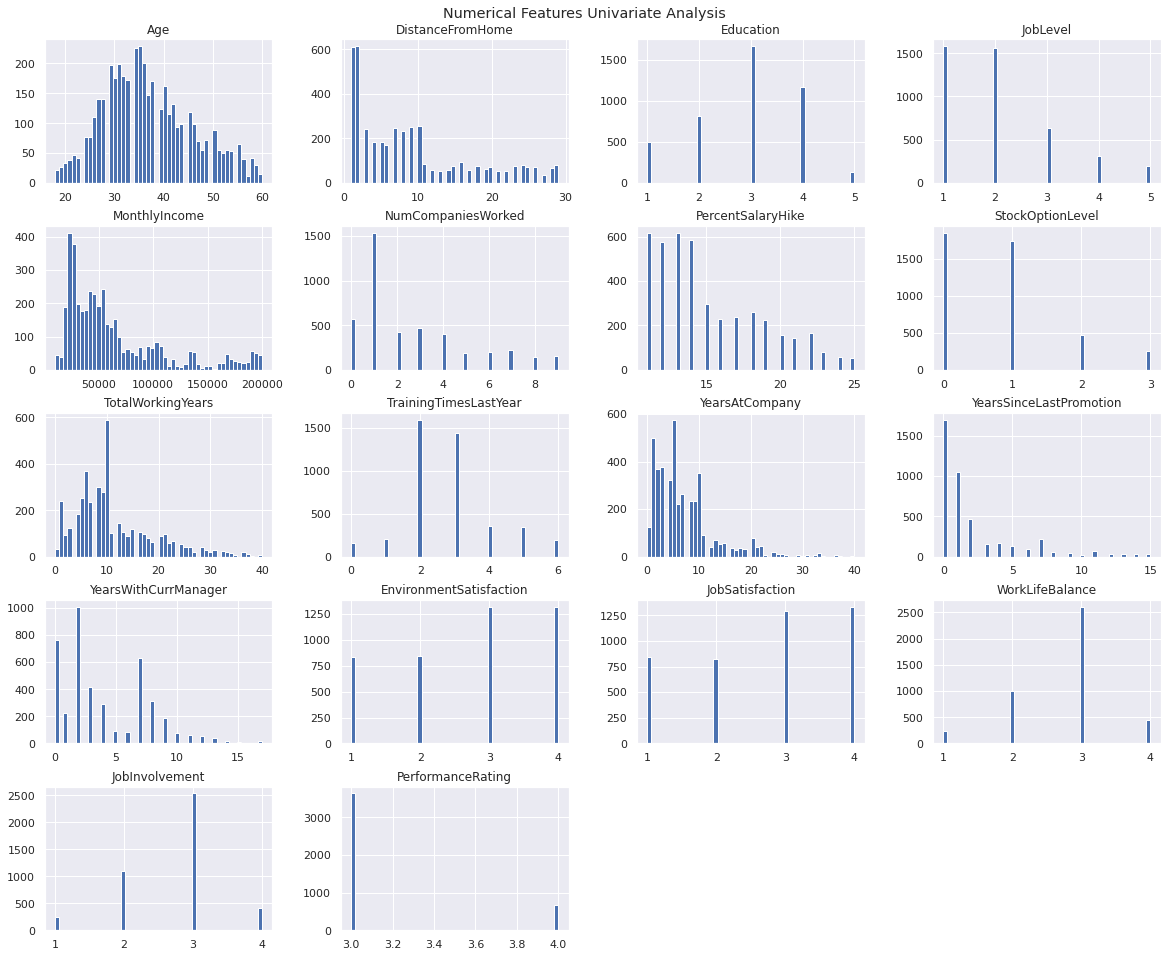

In [ ]:
general_data.hist(bins=50, figsize=(20,15))
plt.suptitle('Numerical Features Univariate Analysis')
plt.subplots_adjust(top=0.95)
plt.show()

## Exploratory Data Analysis - Multivariate Analysis

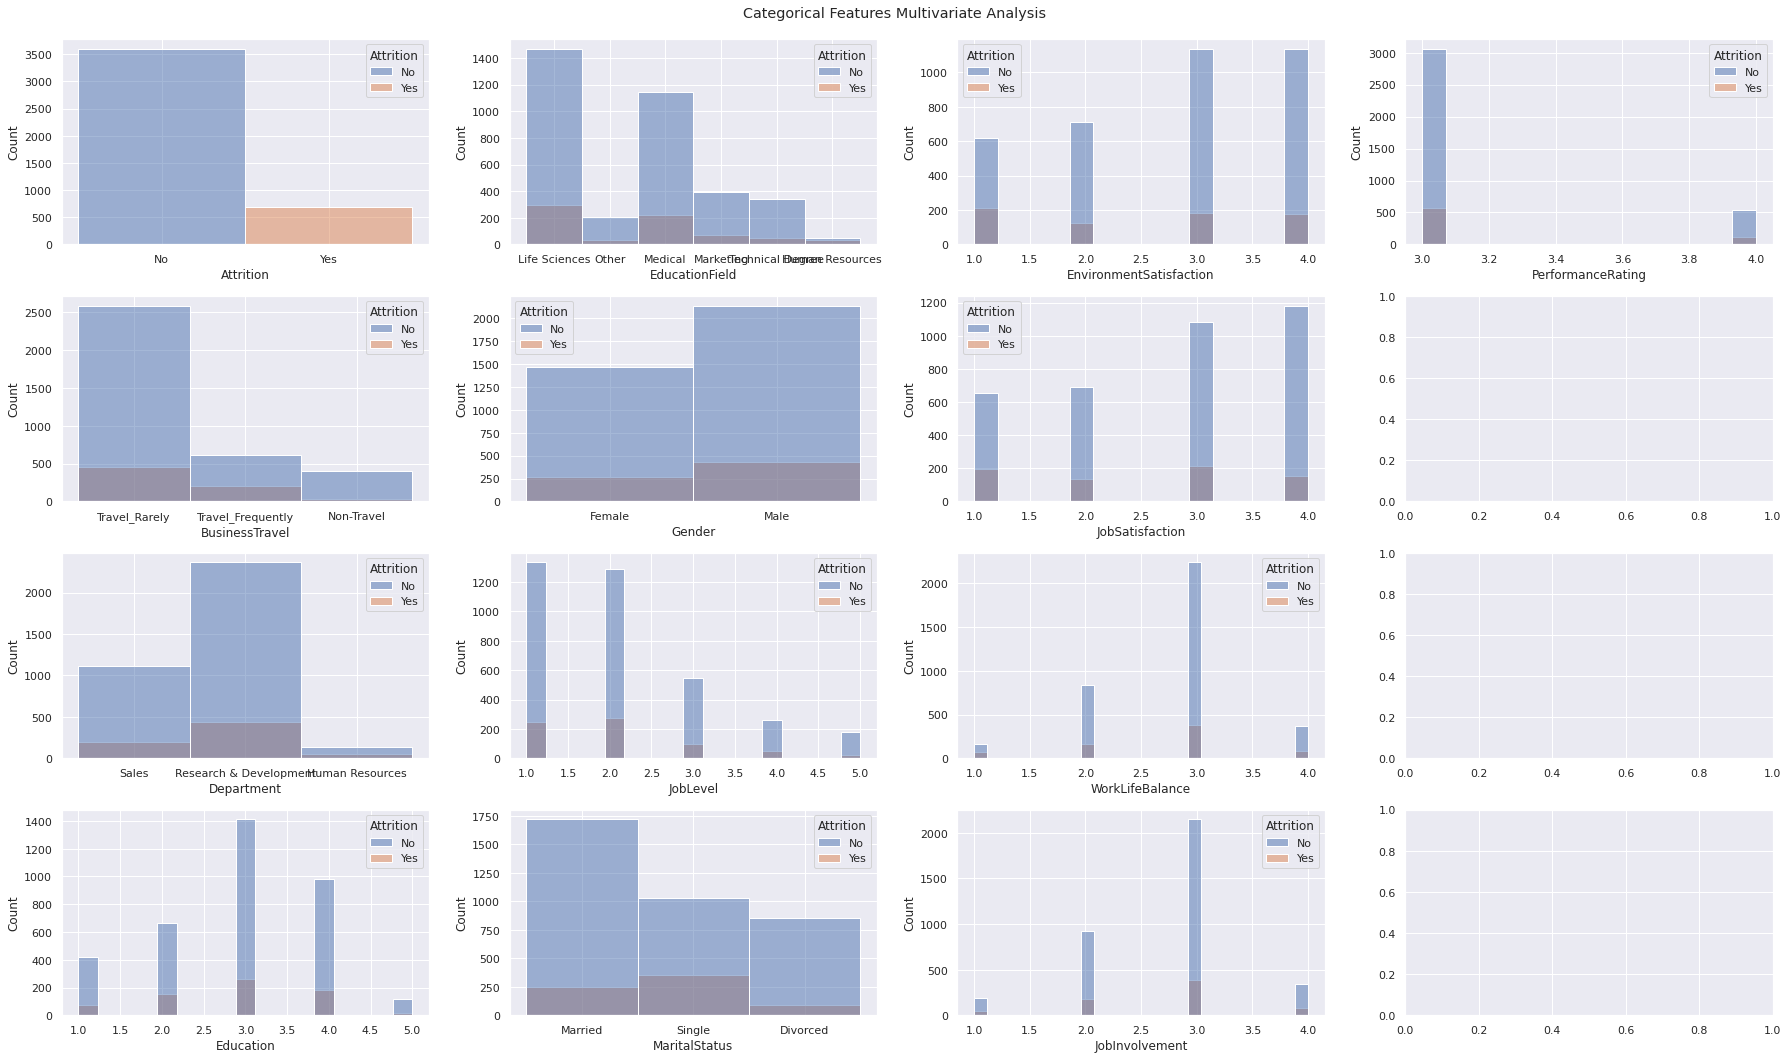

In [ ]:
f, axes = plt.subplots(4, 4, figsize=(25, 15))

j = 0
for i, feature in enumerate(categorical_features, 1):
  sns.histplot(data=general_data, x=str(feature), stat="count", hue="Attrition", ax=axes[i-4*j-1, j])
  if i % 4 == 0:
    j += 1

plt.tight_layout()
plt.suptitle('Categorical Features Multivariate Analysis')
plt.subplots_adjust(top=0.95)
plt.show()

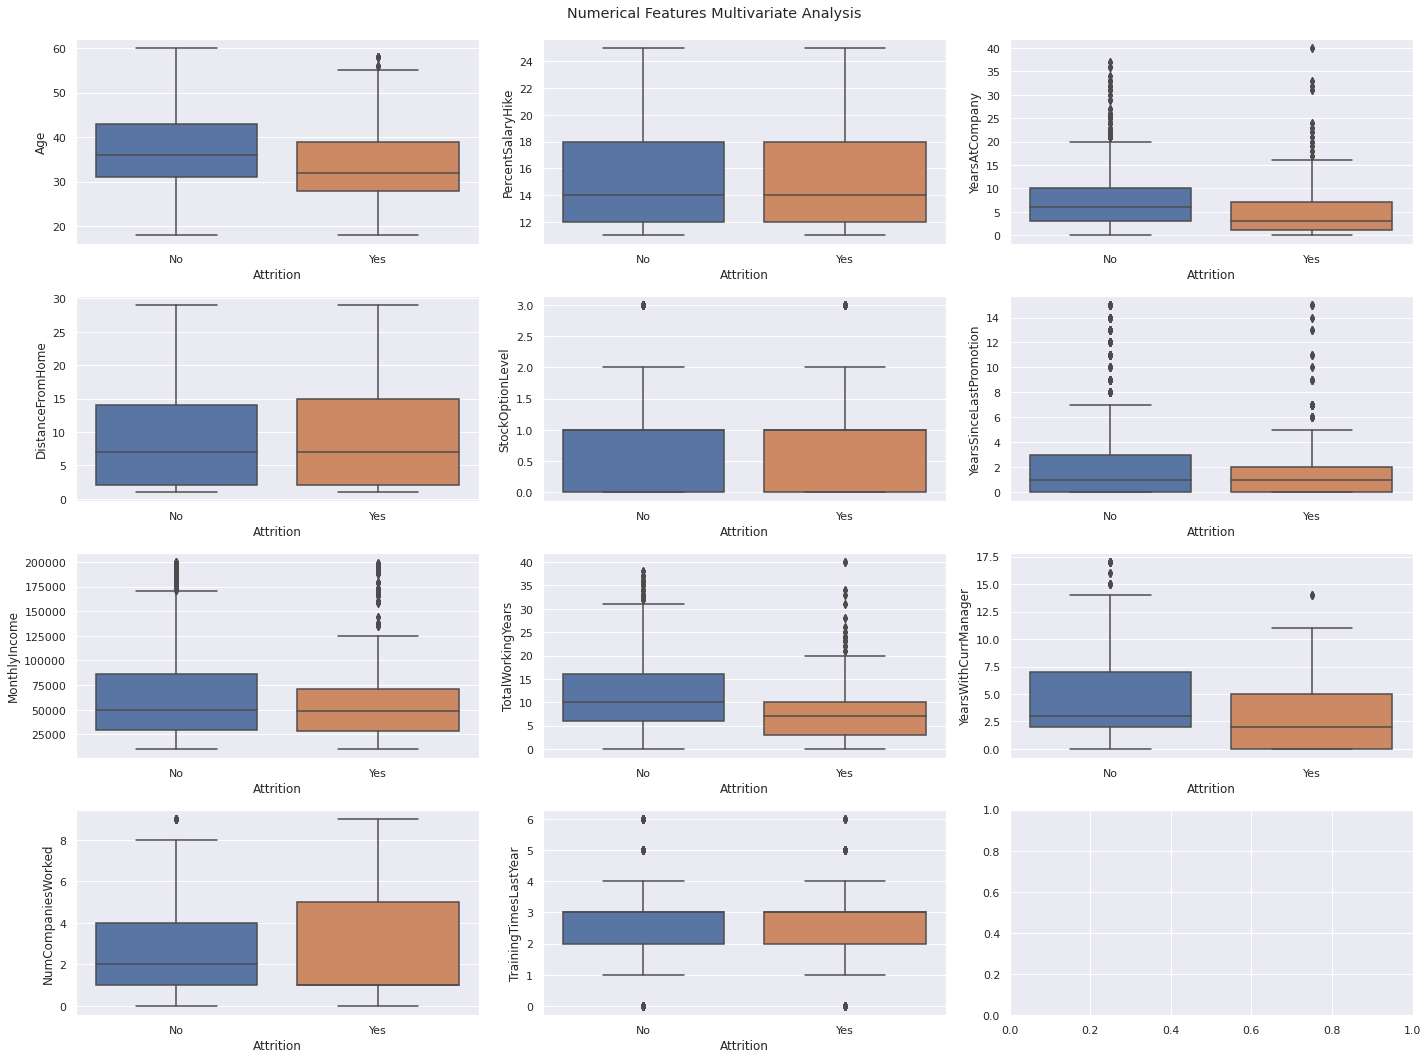

In [ ]:
f, axes = plt.subplots(4, 3, figsize=(20, 15))

j = 0
for i, feature in enumerate(numerical_features, 1):
  sns.boxplot(data=general_data, x="Attrition", y=str(feature), ax=axes[i-4*j-1, j])
  if i % 4 == 0:
    j += 1

plt.tight_layout()
plt.suptitle('Numerical Features Multivariate Analysis')
plt.subplots_adjust(top=0.95)
plt.show()

# Data Preparation

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelEncoder_X = LabelEncoder()
general_data['BusinessTravel'] = labelEncoder_X.fit_transform(general_data['BusinessTravel'])
general_data['Department'] = labelEncoder_X.fit_transform(general_data['Department'])
general_data['EducationField'] = labelEncoder_X.fit_transform(general_data['EducationField'])
general_data['Gender'] = labelEncoder_X.fit_transform(general_data['Gender'])
general_data['MaritalStatus'] = labelEncoder_X.fit_transform(general_data['MaritalStatus'])

general_data['Attrition'] = labelEncoder_X.fit_transform(general_data['Attrition'])

general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,2,2,6,2,1,0,1,1,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,1,1,10,1,1,0,1,2,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,1,1,17,4,4,1,4,1,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,0,1,2,5,1,1,3,1,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,2,1,10,1,3,1,1,2,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


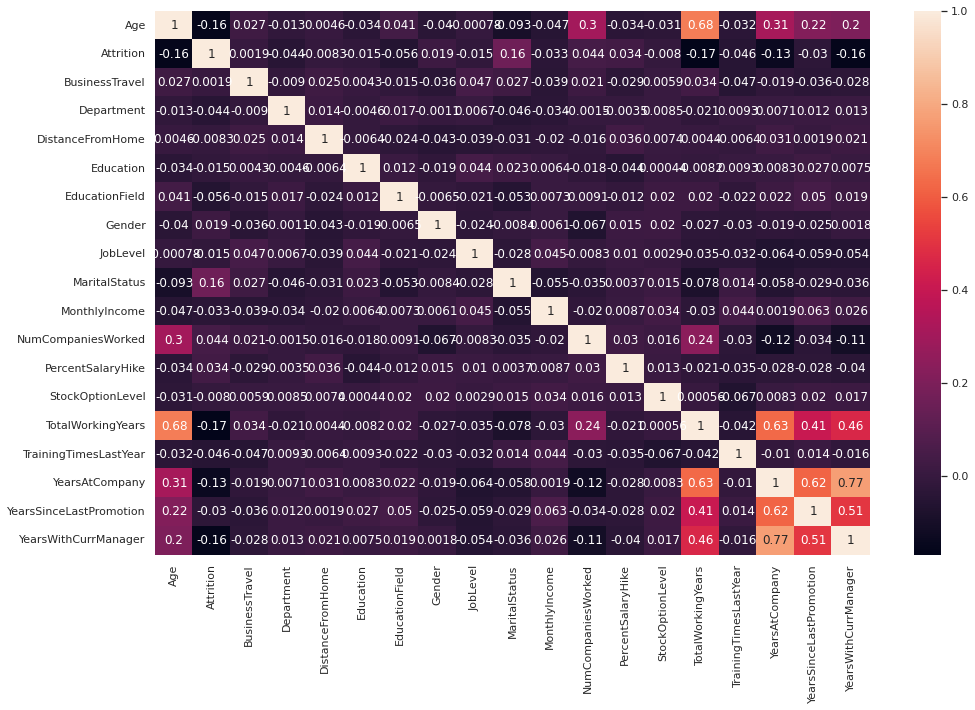

In [ ]:
corr = general_data.iloc[: , :19].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=1)
pca.fit(general_data[['YearsAtCompany','YearsSinceLastPromotion', "YearsWithCurrManager"]])
general_data['YearsInCompany'] = pca.transform(general_data.loc[:, ('YearsAtCompany','YearsSinceLastPromotion', "YearsWithCurrManager")]).flatten()
general_data.drop(['YearsAtCompany','YearsSinceLastPromotion', "YearsWithCurrManager"], axis=1, inplace=True)

In [ ]:
pca = PCA(n_components=1, random_state=1)
pca.fit(general_data[['TotalWorkingYears', "Age"]])
general_data['YearsOfWorking'] = pca.transform(general_data.loc[:, ('TotalWorkingYears', "Age")]).flatten()
general_data.drop(['TotalWorkingYears', "Age"], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = general_data.drop(["Attrition"], axis = 1)
y = general_data["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [ ]:
general_data.describe().round(4)

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,YearsInCompany,YearsOfWorking
count,4300.0000,4300.0000,4300.0000,4300.0000,4300.0000,4300.0000,4300.0000,4300.0000,4300.0000,4300.0000,4300.0000,4300.0000,4300.0000,4300.0000,4300.0000,4300.0000,4300.0000,4300.0000,4300.0000,4300.0000,4300.0000
mean,0.1616,1.6072,1.2607,9.1979,2.9133,2.2474,0.5979,2.0670,1.1007,65059.8442,2.6900,15.2107,0.7953,2.7963,2.7240,2.7249,2.7612,2.7288,3.1540,0.0000,-0.0000
std,0.3682,0.6658,0.5285,8.0971,1.0248,1.3288,0.4904,1.1066,0.7294,47045.3989,2.4958,3.6628,0.8535,1.2901,1.0938,1.1019,0.7078,0.7108,0.3609,7.1316,11.0476
min,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,10090.0000,0.0000,11.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,3.0000,-8.4058,-21.8456
25%,0.0000,1.0000,1.0000,2.0000,2.0000,1.0000,0.0000,1.0000,1.0000,29260.0000,1.0000,12.0000,0.0000,2.0000,2.0000,2.0000,2.0000,2.0000,3.0000,-5.0157,-7.7988
50%,0.0000,2.0000,1.0000,7.0000,3.0000,2.0000,1.0000,2.0000,1.0000,49360.0000,2.0000,14.0000,1.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,-2.4732,-1.8167
75%,0.0000,2.0000,2.0000,14.0000,4.0000,3.0000,1.0000,3.0000,2.0000,83802.5000,4.0000,18.0000,1.0000,3.0000,4.0000,4.0000,3.0000,3.0000,3.0000,3.4594,6.4119
max,1.0000,2.0000,2.0000,29.0000,5.0000,5.0000,1.0000,5.0000,2.0000,199990.0000,9.0000,25.0000,3.0000,6.0000,4.0000,4.0000,4.0000,4.0000,4.0000,32.8325,34.3415


# Model Development

### Model Development: Logistic Regression



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

### Model Development: K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

### Model Development: Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Model Evaluation

In [ ]:
from sklearn.metrics import balanced_accuracy_score

acc_score = pd.DataFrame(columns=['balanced_accuracy_score'], index=['KNN','LR', 'SVC'])
classifiers = {'KNN': KNeighborsClassifier(), 'LR': LogisticRegression(), 'SVC': SVC()}

for name, classifier in classifiers.items():
  acc_score.loc[name, 'balanced_accuracy_score'] = balanced_accuracy_score(y_true=y_test, y_pred=classifier.fit(X_train, y_train).predict(X_test))
 
pd.DataFrame(acc_score)

,balanced_accuracy_score
KNN,0.616596
LR,0.565806
SVC,0.71059


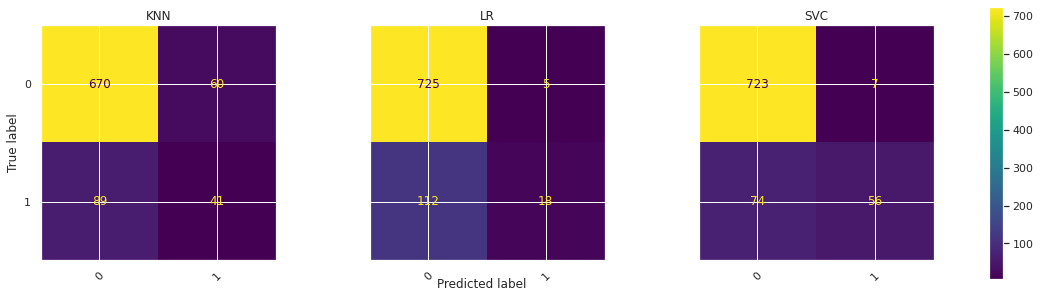

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix, display_labels=classifier.classes_)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_score = pd.DataFrame(columns=['precision', 'recall', 'fscore', 'support'], index=['KNN','LR', 'SVC'])

for name, classifier in classifiers.items():
  for i, column in enumerate(precision_recall_score.columns):
    precision_recall_score.loc[name, column] = precision_recall_fscore_support(y_true=y_test, y_pred=classifier.fit(X_train, y_train).predict(X_test), average="binary")[i]

pd.DataFrame(precision_recall_score)

,precision,recall,fscore,support
KNN,0.405941,0.315385,0.354978,None
LR,0.782609,0.138462,0.235294,None
SVC,0.888889,0.430769,0.580311,None
